In [36]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [37]:
# Import dataset

ds = pd.read_csv("Social_Network_Ads.csv")
ds

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [38]:
ds.duplicated().sum()

np.int64(33)

In [39]:
ds.drop_duplicates(inplace = True)

In [40]:
ds.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [41]:
# Splitting

x=ds[['Age','EstimatedSalary']]
y=ds[['Purchased']]

In [42]:
x

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [43]:
y

,Purchased
0,0
1,0
2,0
3,0
4,0
...,...
395,1
396,1
397,1
398,0


In [44]:
# Feauture Scailing

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x=sc.fit_transform(x)

In [45]:
# Model Selection and Model Fitting with train and test data

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20,random_state =0)

In [46]:
x_train

array([[-1.28642555, -0.36629031],
       [ 1.33853652,  0.55524212],
       [-0.16144181,  1.361583  ],
       [ 1.43228516,  0.95841256],
       [-0.16144181,  2.1103281 ],
       [-0.16144181,  0.81442312],
       [ 0.86979329, -0.62547131],
       [ 0.30730142, -0.74066286],
       [-0.16144181, -0.59667342],
       [-1.28642555, -1.11503541],
       [ 1.24478787, -1.37421641],
       [ 1.52603381, -1.28782274],
       [ 0.96354193,  1.39038089],
       [ 2.08852568,  1.07360412],
       [ 0.96354193,  1.93754077],
       [ 1.90102839, -0.94224808],
       [-0.16144181,  1.56316822],
       [ 0.96354193, -0.85585441],
       [ 1.99477703,  2.08153022],
       [ 1.15103923,  0.49764635],
       [ 1.33853652,  2.28311544],
       [-0.25519045, -0.33749242],
       [-0.06769316,  0.03688013],
       [-1.47392284, -0.22230087],
       [-1.75516878,  0.41125268],
       [-1.66142013,  0.44005057],
       [ 1.80727974, -1.08623752],
       [-1.84891742,  0.44005057],
       [ 1.52603381,

In [47]:
#Applying Decision Tree Algorithm

from sklearn.tree import DecisionTreeClassifier
cls = DecisionTreeClassifier(criterion ='entropy',random_state =0)
cls.fit(x_train,y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


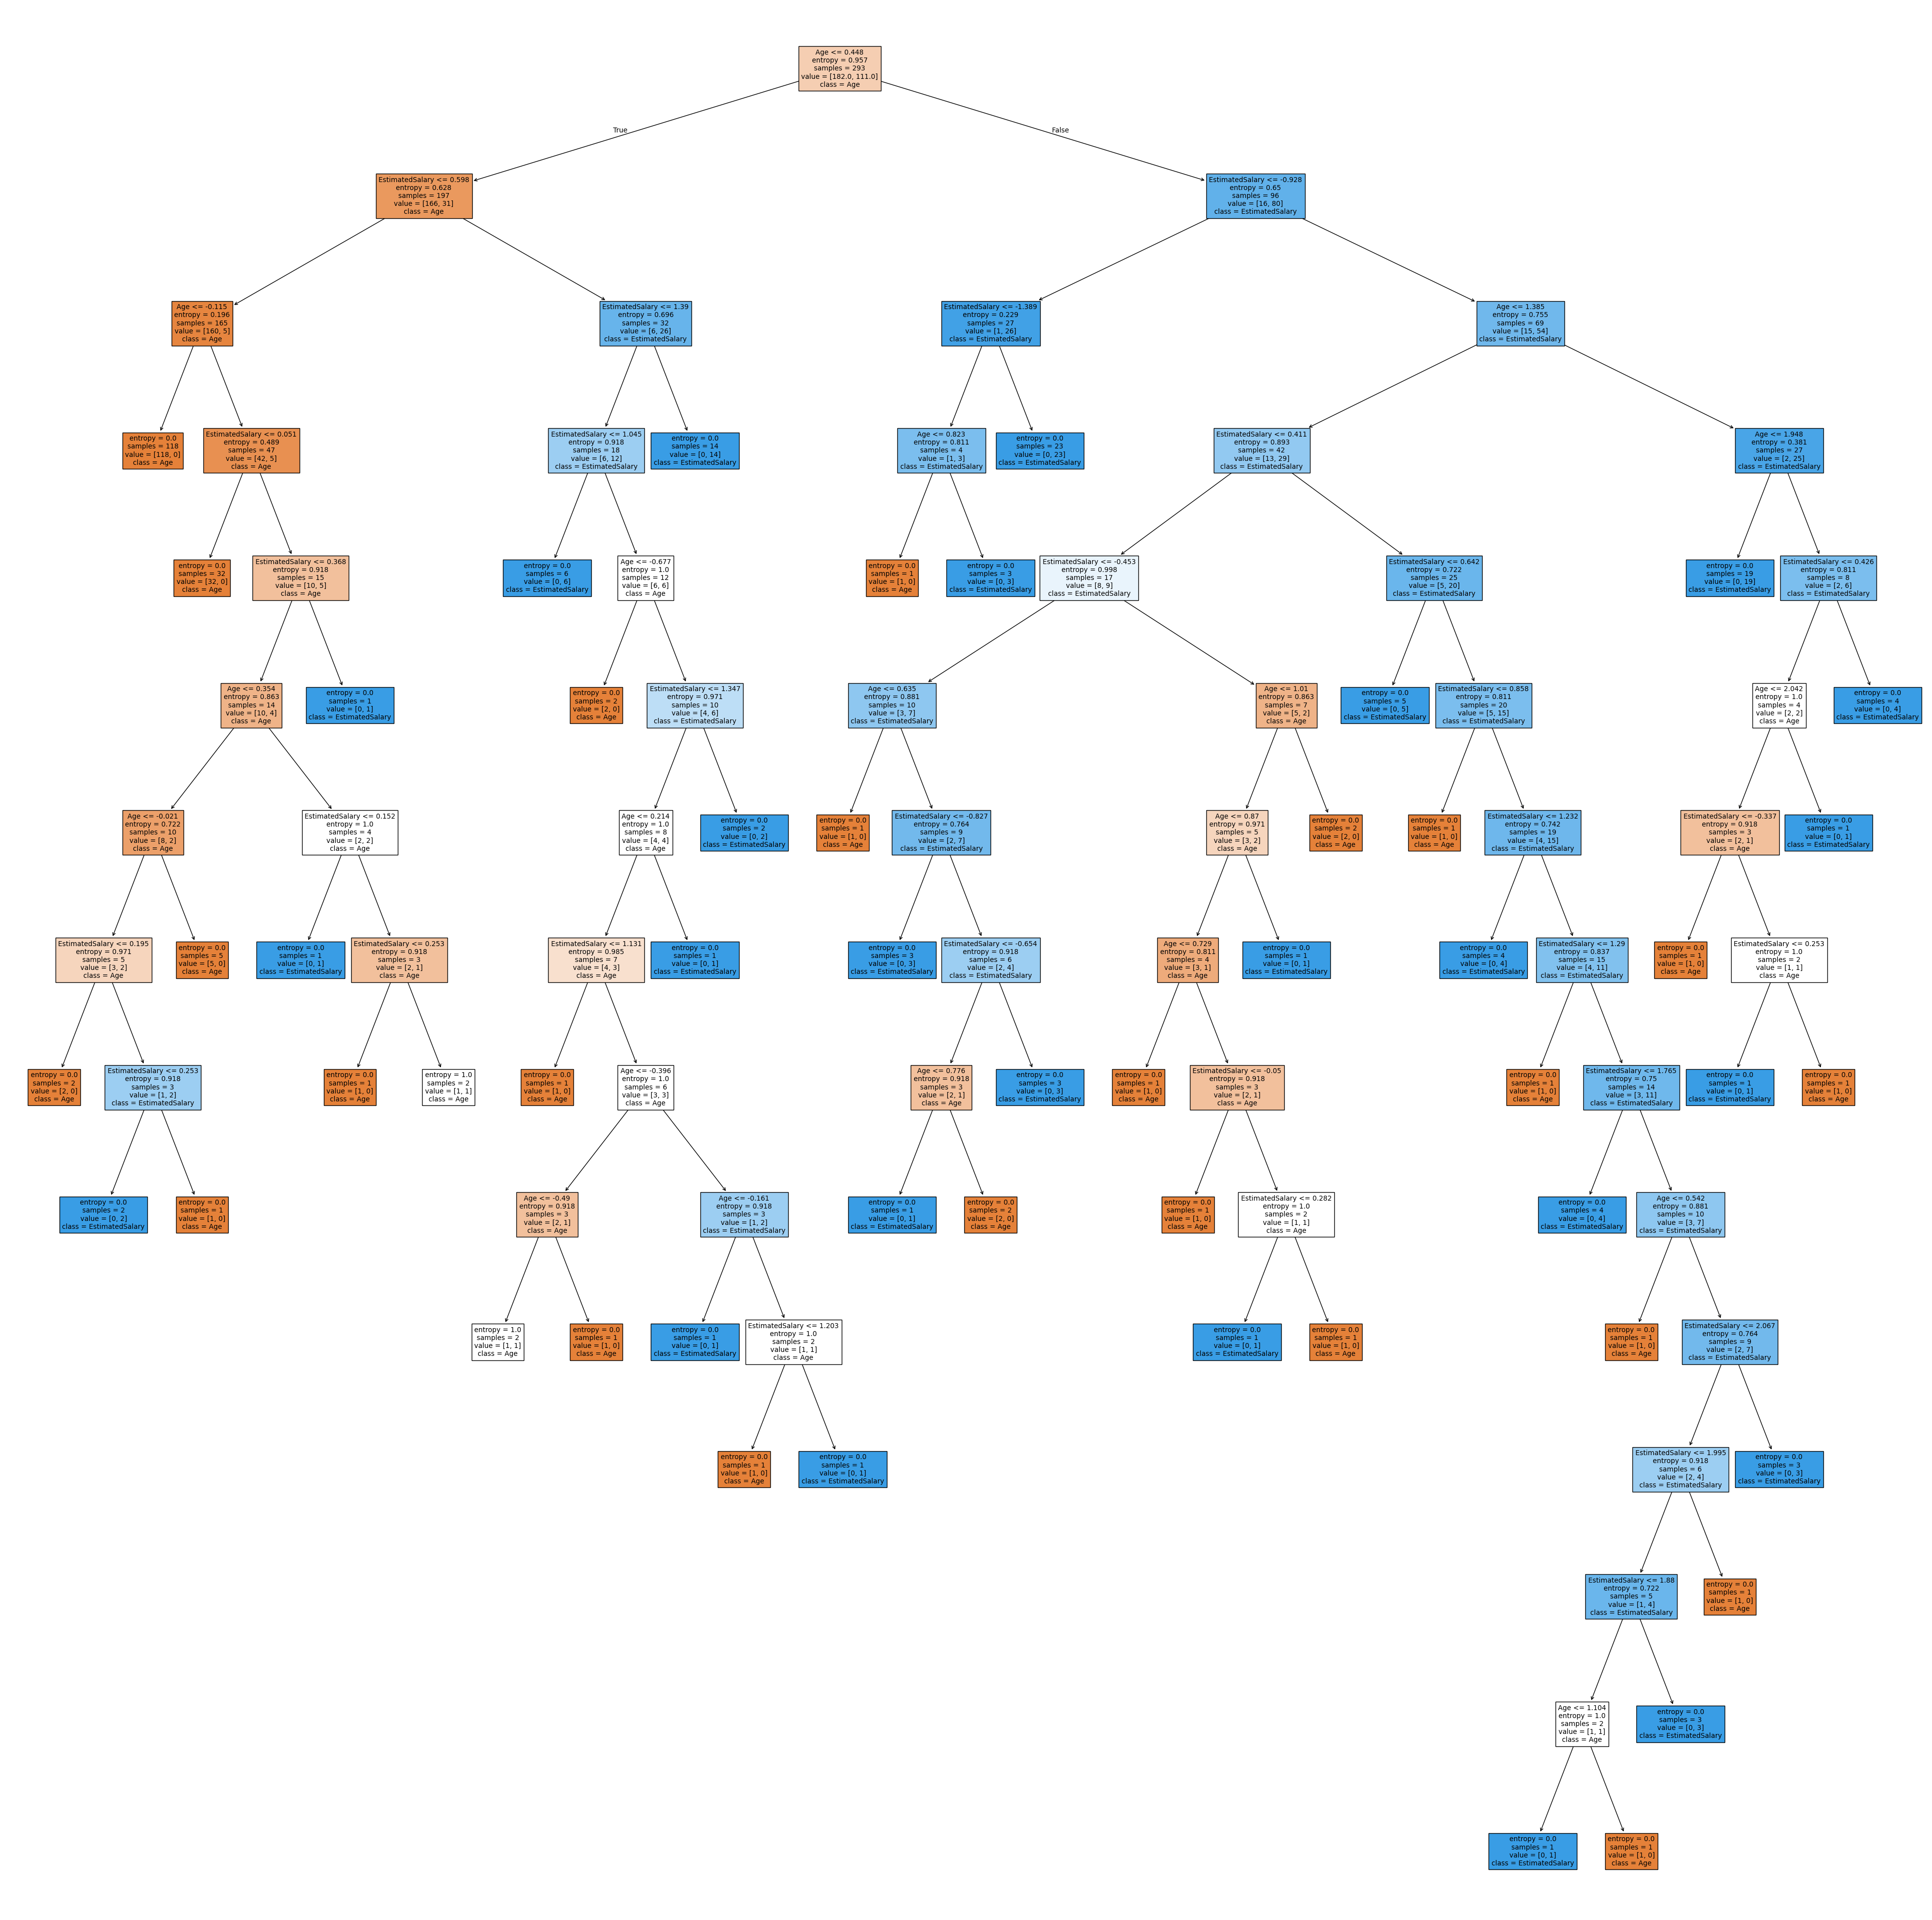

In [48]:
# PLot For Decision Tree

from sklearn.tree import plot_tree
plt.figure(figsize =(50,50))
plot_tree(cls,filled =True,feature_names =['Age','EstimatedSalary'],class_names =['Age','EstimatedSalary'])
plt.show()

In [49]:
#Prediction for my input

result = cls.predict(sc.transform([[30,150000]]))
result

array([1])

In [50]:
# Accuracy of Prediction

from sklearn.metrics import accuracy_score


# Predict the Lables for the test set
y_pred = cls.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test,y_pred)

print(f'Accuracy :{accuracy * 100:.2f}%')

Accuracy :86.49%


In [ ]:
# User Input

age = float(input("Enter Age :"))
salary = float(input("Enter Esimated Salary:"))

myinput = pd.DataFrame(sc.transform([[age,salary]]),columns =['Age','EstimatedSalary'])
result = cls.predict(myinput)
if result[0]==1:
    print("Prediction : user will purchase plan")
else :
    print("Prediction : user will not purchase plan")